# Importing Libraries

In [5]:
!pip install mlxtend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
#ignore the warnings
import warnings 
warnings.filterwarnings('ignore')



[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Understanding the Data


In [77]:
# train data set 
df = pd.read_csv('train.csv',index_col='Unnamed: 0') 
df.head()

#checking the shape of the dataset 
df.shape 

(103904, 24)

In [78]:
# read the test data set 
df_test = pd.read_csv('test.csv',index_col='Unnamed: 0')

In [79]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [80]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

# Data preparation

## Checking the count of Null Values

In [82]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [83]:
df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [84]:
# replacing the null values with zero
df.fillna(0,inplace = True)

In [85]:
# replacing the null values with zero in test dataset
df_test.fillna(0,inplace = True)

In [86]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [87]:
df_test.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [88]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# EDA

### 1. Target Variable : Satisfaction

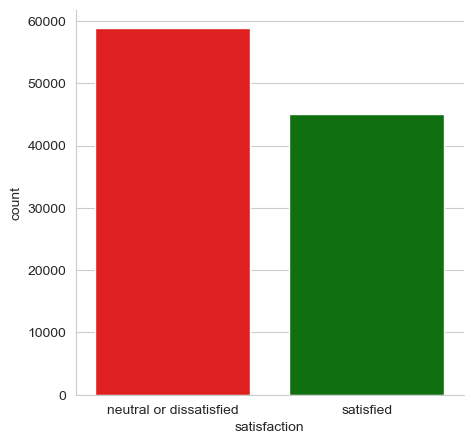

In [89]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(df['satisfaction'],palette=['r','g'])
sns.despine()
plt.show()

#### Interpretation: 
The Target Variable "Satistfaction" is not properly balanced but the difference isn't too much,so we can go ahead with it

In [90]:
#valuecounts for the column 'satisfaction'
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

### Gender-wise countplot for 'satisfaction' column 

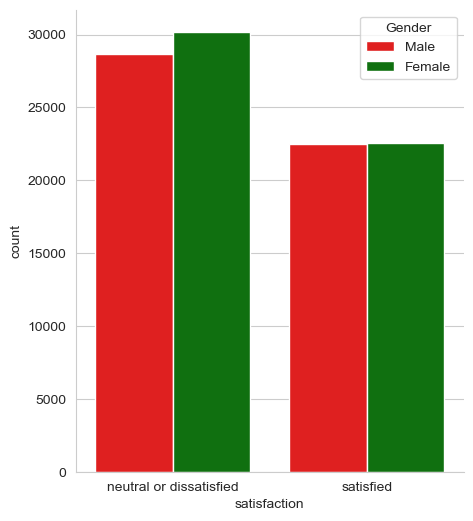

In [91]:
plt.figure(figsize=(5,6))
sns.countplot(df['satisfaction'],hue=df['Gender'],palette=['r','g'])
sns.despine()
plt.show()

#### Interpretation: 
The satisfaction level for both the genders is almost the same.

### Distribution Of Continuous Variables :
***'Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'***

In [92]:
#list of continuous variables:
c_var=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

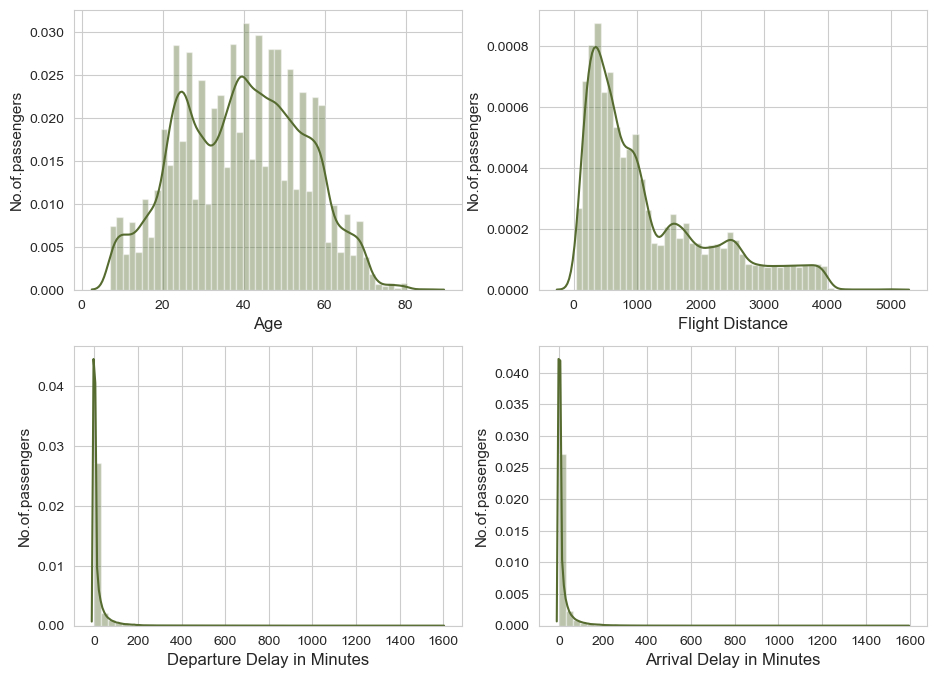

In [93]:
plt.figure(figsize=(11,8))
sns.despine()
for i,j in enumerate(c_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df[j],hist=True,color='darkolivegreen')
    plt.xlabel(j,fontsize=12)
    plt.ylabel('No.of.passengers',fontsize=11)
plt.show()

#### Interpretation:

**Age vs No. of passengers** The age distribution is not perfectly normal, but it partly follows a normal pattern. The primary age group of travelers falls between 20 and 60.

**flight distance vs No. of passengers** It shows a right-skewed distribution. The majority of flights cover distances ranging from 100 miles to 1000 miles, with the shortest distance observed being 31 miles (from Alaska to Petersburg).

**Departure Delay vs No. of passengers** & **Arrival Delay vs No. of passengers** : 
The data exhibits significant right-skewness, with the majority of delays in minutes falling between 10 to 100 minutes.

# Categorical Variables : 'Customer Type','Type of Travel','Class'

In [94]:
cat_var= ['Customer Type','Type of Travel','Class']

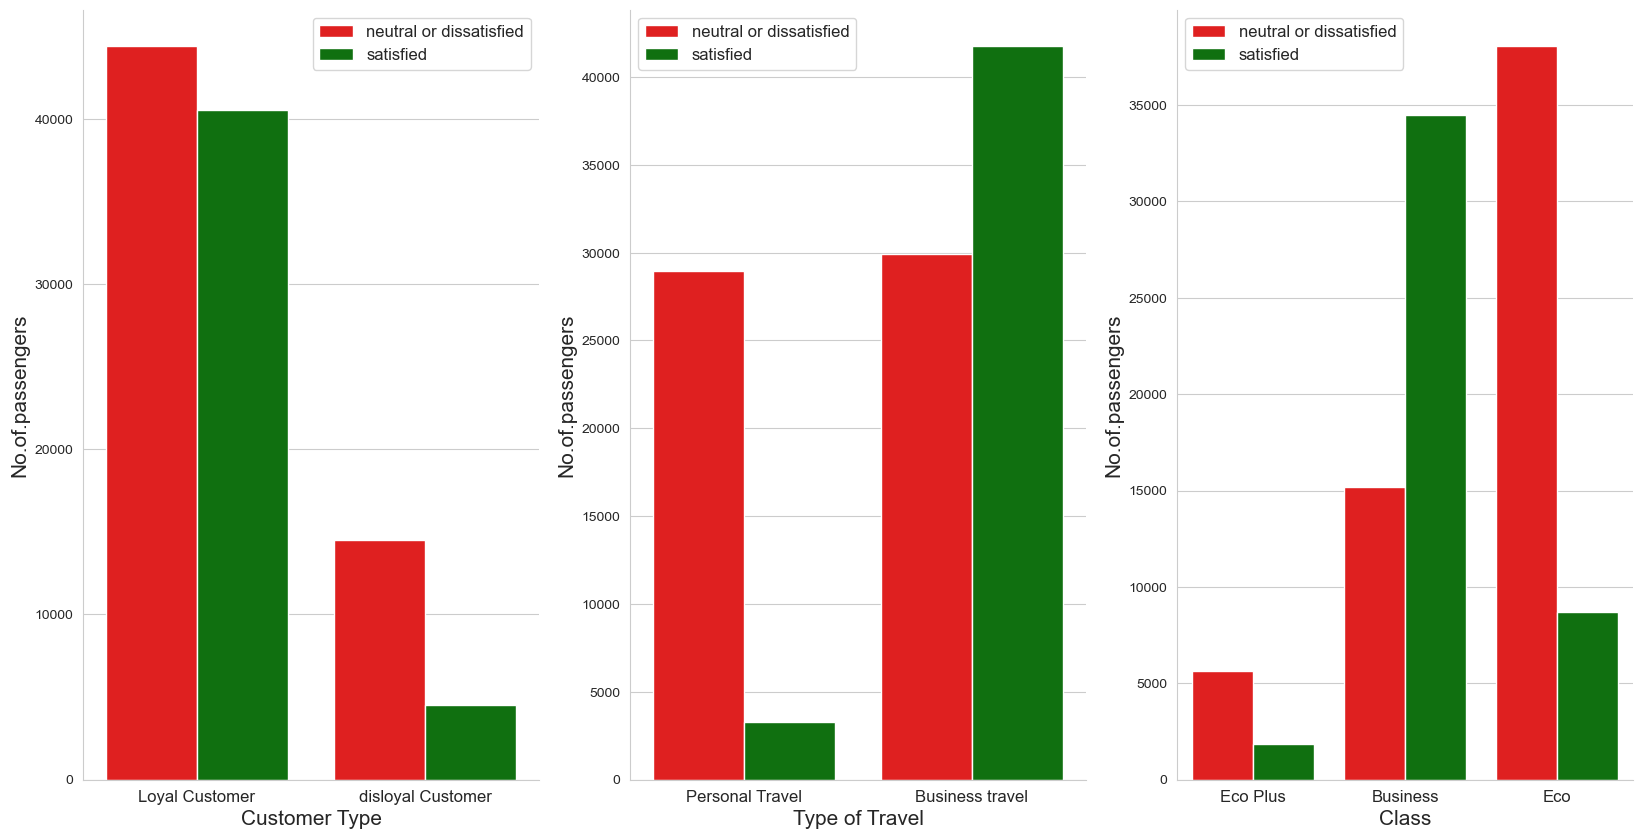

In [95]:
plt.figure(figsize=(20,10))
# initiating a for lop to create subplot 
for i,j in enumerate(cat_var):
    plt.subplot(1,3,i+1)
    sns.countplot(df[j],hue=df['satisfaction'],palette=['r','g'])
    sns.despine()
    plt.xlabel(j,fontsize=15)
    plt.xticks(fontsize='large')
    plt.ylabel('No.of.passengers',fontsize=15)
    plt.legend(fontsize='large')
plt.show()

**Interpretation:**

**Customer Type:** The data shows a higher count of returning/Loyal customers compared to Disloyal customers. Within the Disloyal customer group, there are more dissatisfied customers, while a balance is observed within the Loyal customers.

**Type of Travel:** Business travel people display higher satisfaction levels with the services compared to personal travel. The airline must take urgent measures to improve the remarkably low satisfaction level observed among passengers traveling for personal reasons.

**Class** Within the three classes, there is a substantial difference in satisfaction levels, with business class passengers being the most satisfied compared to economy and economy plus class passengers. This difference is understandable considering the premium services offered to business class travelers.The airline could conduct surveys or collect feedback from passengers of all classes to identify specific areas of improvement, ensuring that the overall passenger experience is enhanced for all travelers.

### Ratings Column

In [96]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [97]:
#fetching the columns which has ratings in it :
rating_var= df.iloc[:,7:21].columns
rating_var

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

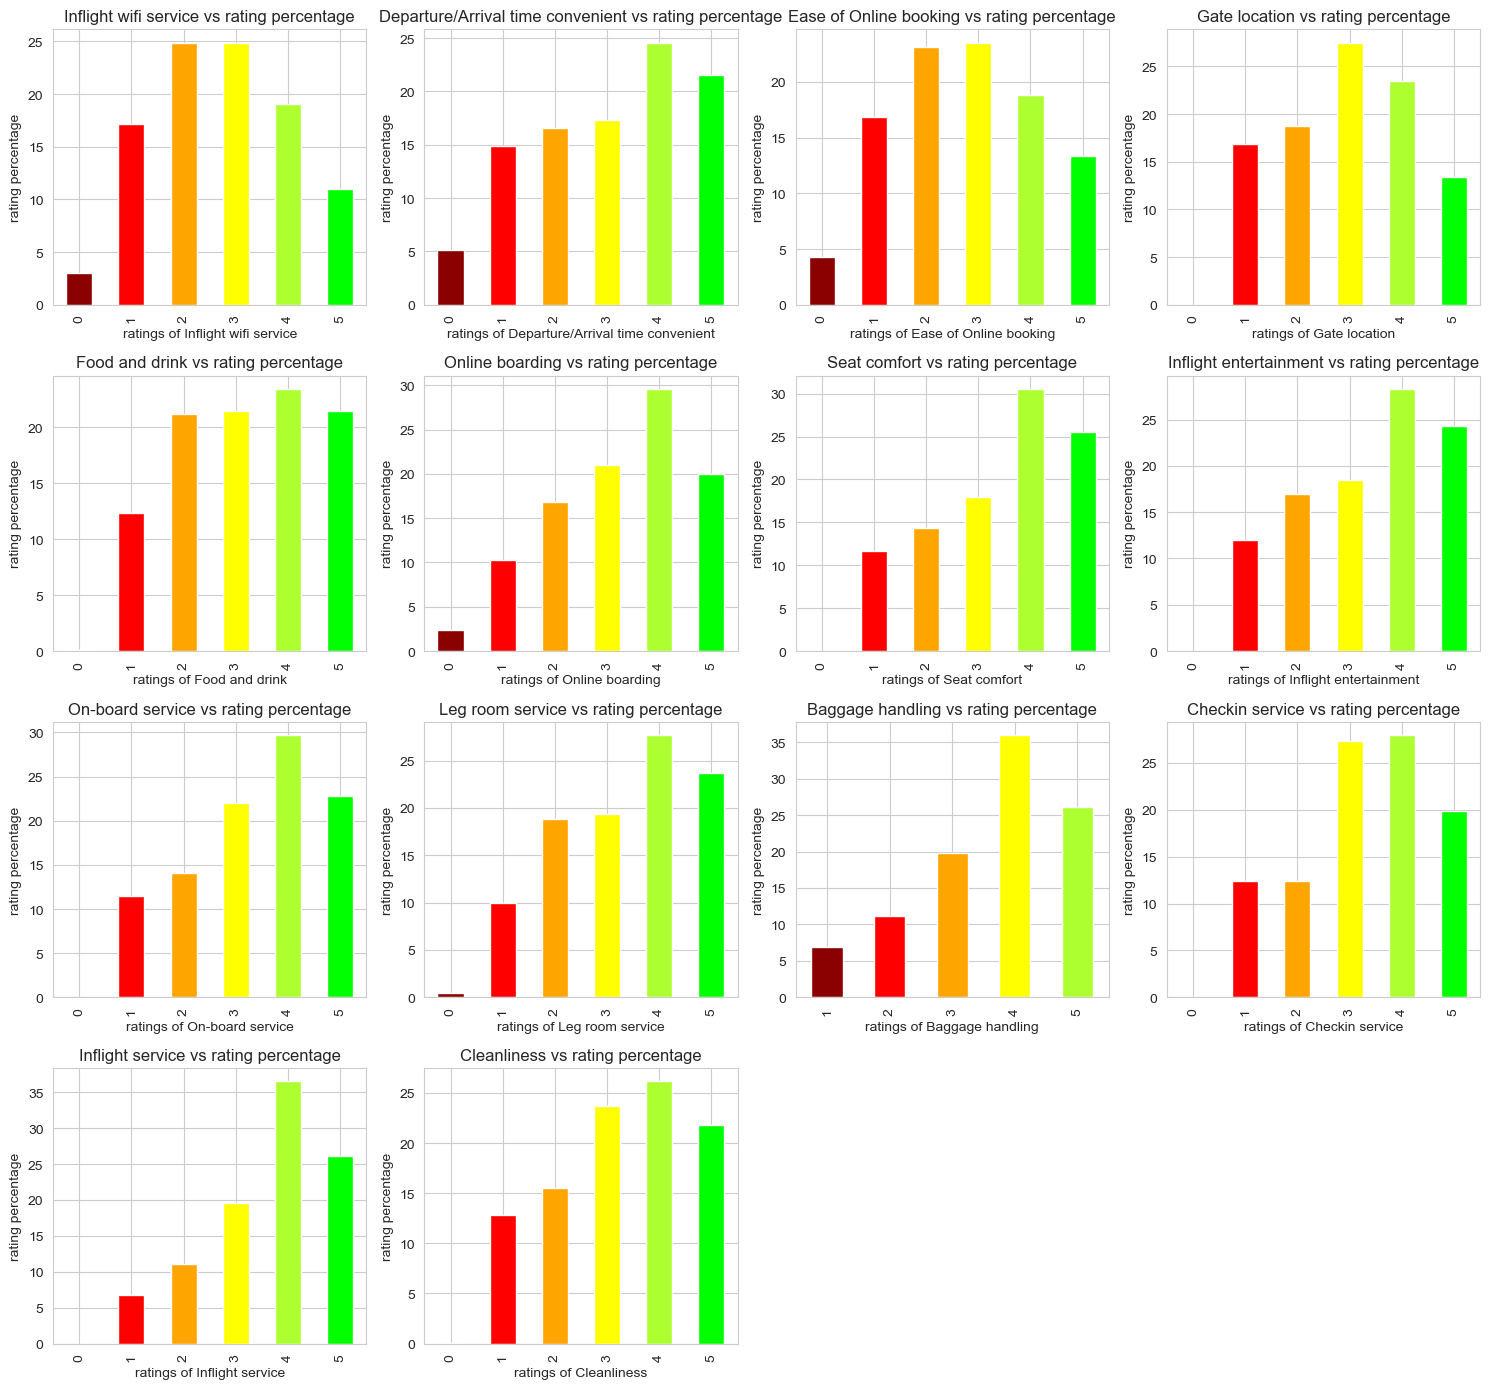

In [98]:
plt.figure(figsize=(15,14))
for i,j in enumerate(rating_var):
    plt.subplot(4,4,i+1)
    (df[j].value_counts(normalize=True)*100).sort_index(ascending = True).plot(kind='bar',color=['darkred','red','orange','yellow','greenyellow','lime'])
    plt.xlabel(f'ratings of {rating_var[i]}')
    plt.ylabel('rating percentage')
    plt.title(f'{rating_var[i]} vs rating percentage')
plt.tight_layout()
plt.show()

**Interpretation:** 
#### Based on the plots presented, the airline excels in the following areas:

Inflight services,
Baggage handling,
Legroom services,
Onboard services,
Seat comfort,
Inflight entertainment.

These aspects receive higher satisfaction ratings and reflect the airline's strong performance in providing quality services to its passengers.


#### Furthermore, there are opportunities for improvement in the following areas:

Food and drinks

Gate location: While some factors related to gate locations might be challenging to change, providing clear signage and efficient communication can help minimize any inconvenience for passengers.

Ease of online booking and 
In-flight Wi-Fi services.



# Checking for Outliers

In [99]:
l= ['Age','Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance']

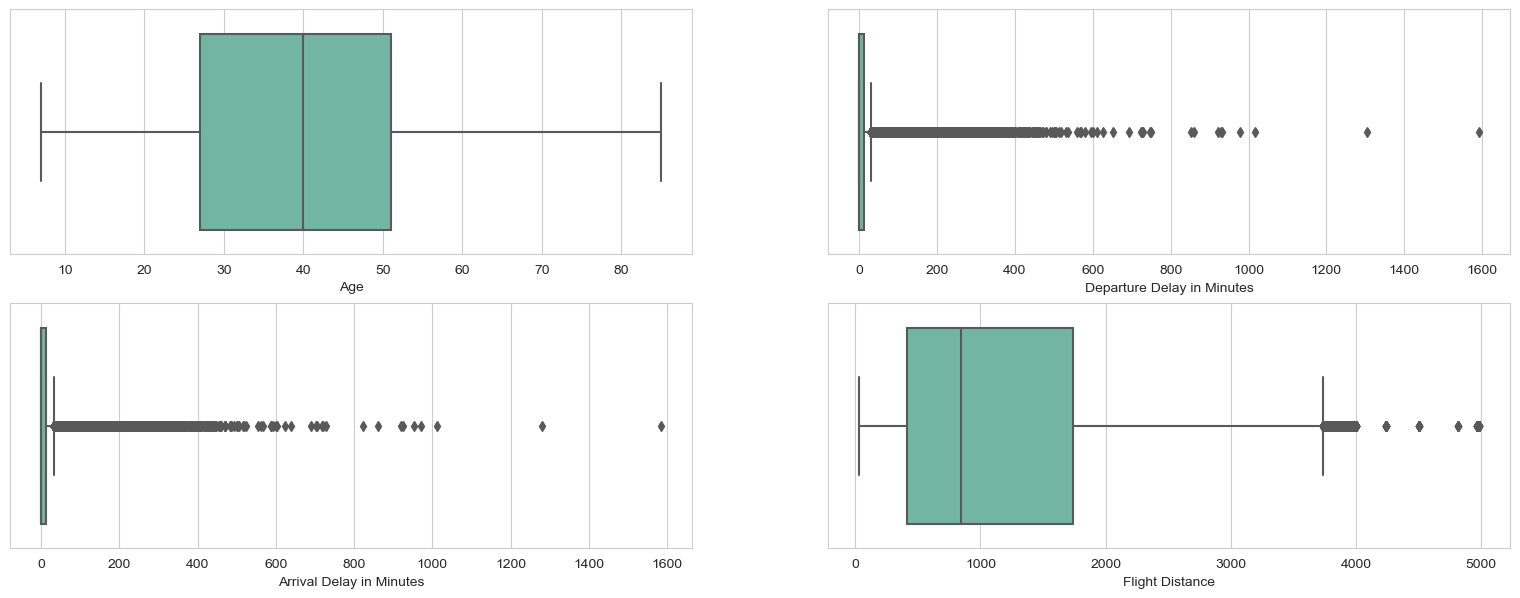

In [100]:
plt.figure(figsize=(8,7))
for x,y in enumerate(l):
    plt.subplot(2,2,x+1)
    sns.boxplot(df[y],palette='Set2')
    plt.subplots_adjust(right=2)
    plt.xlabel(y)
plt.show()

   

**Interpretation:** 
1. The Departure Delay in Minutes and Arrival Delay in Minutes have a significant number of outliers

2. The majority of flights cover a distance ranging from 400 to 1800 miles, and a few outliers indicate that there are also some flights for long distances.

3. Majority of passengers are in the age group of 27-52 

In [101]:
#checking the skewness of the data :
skewed=df.skew()
skewed

id                                   0.002864
Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Arrival Delay in Minutes             6.605288
dtype: float64

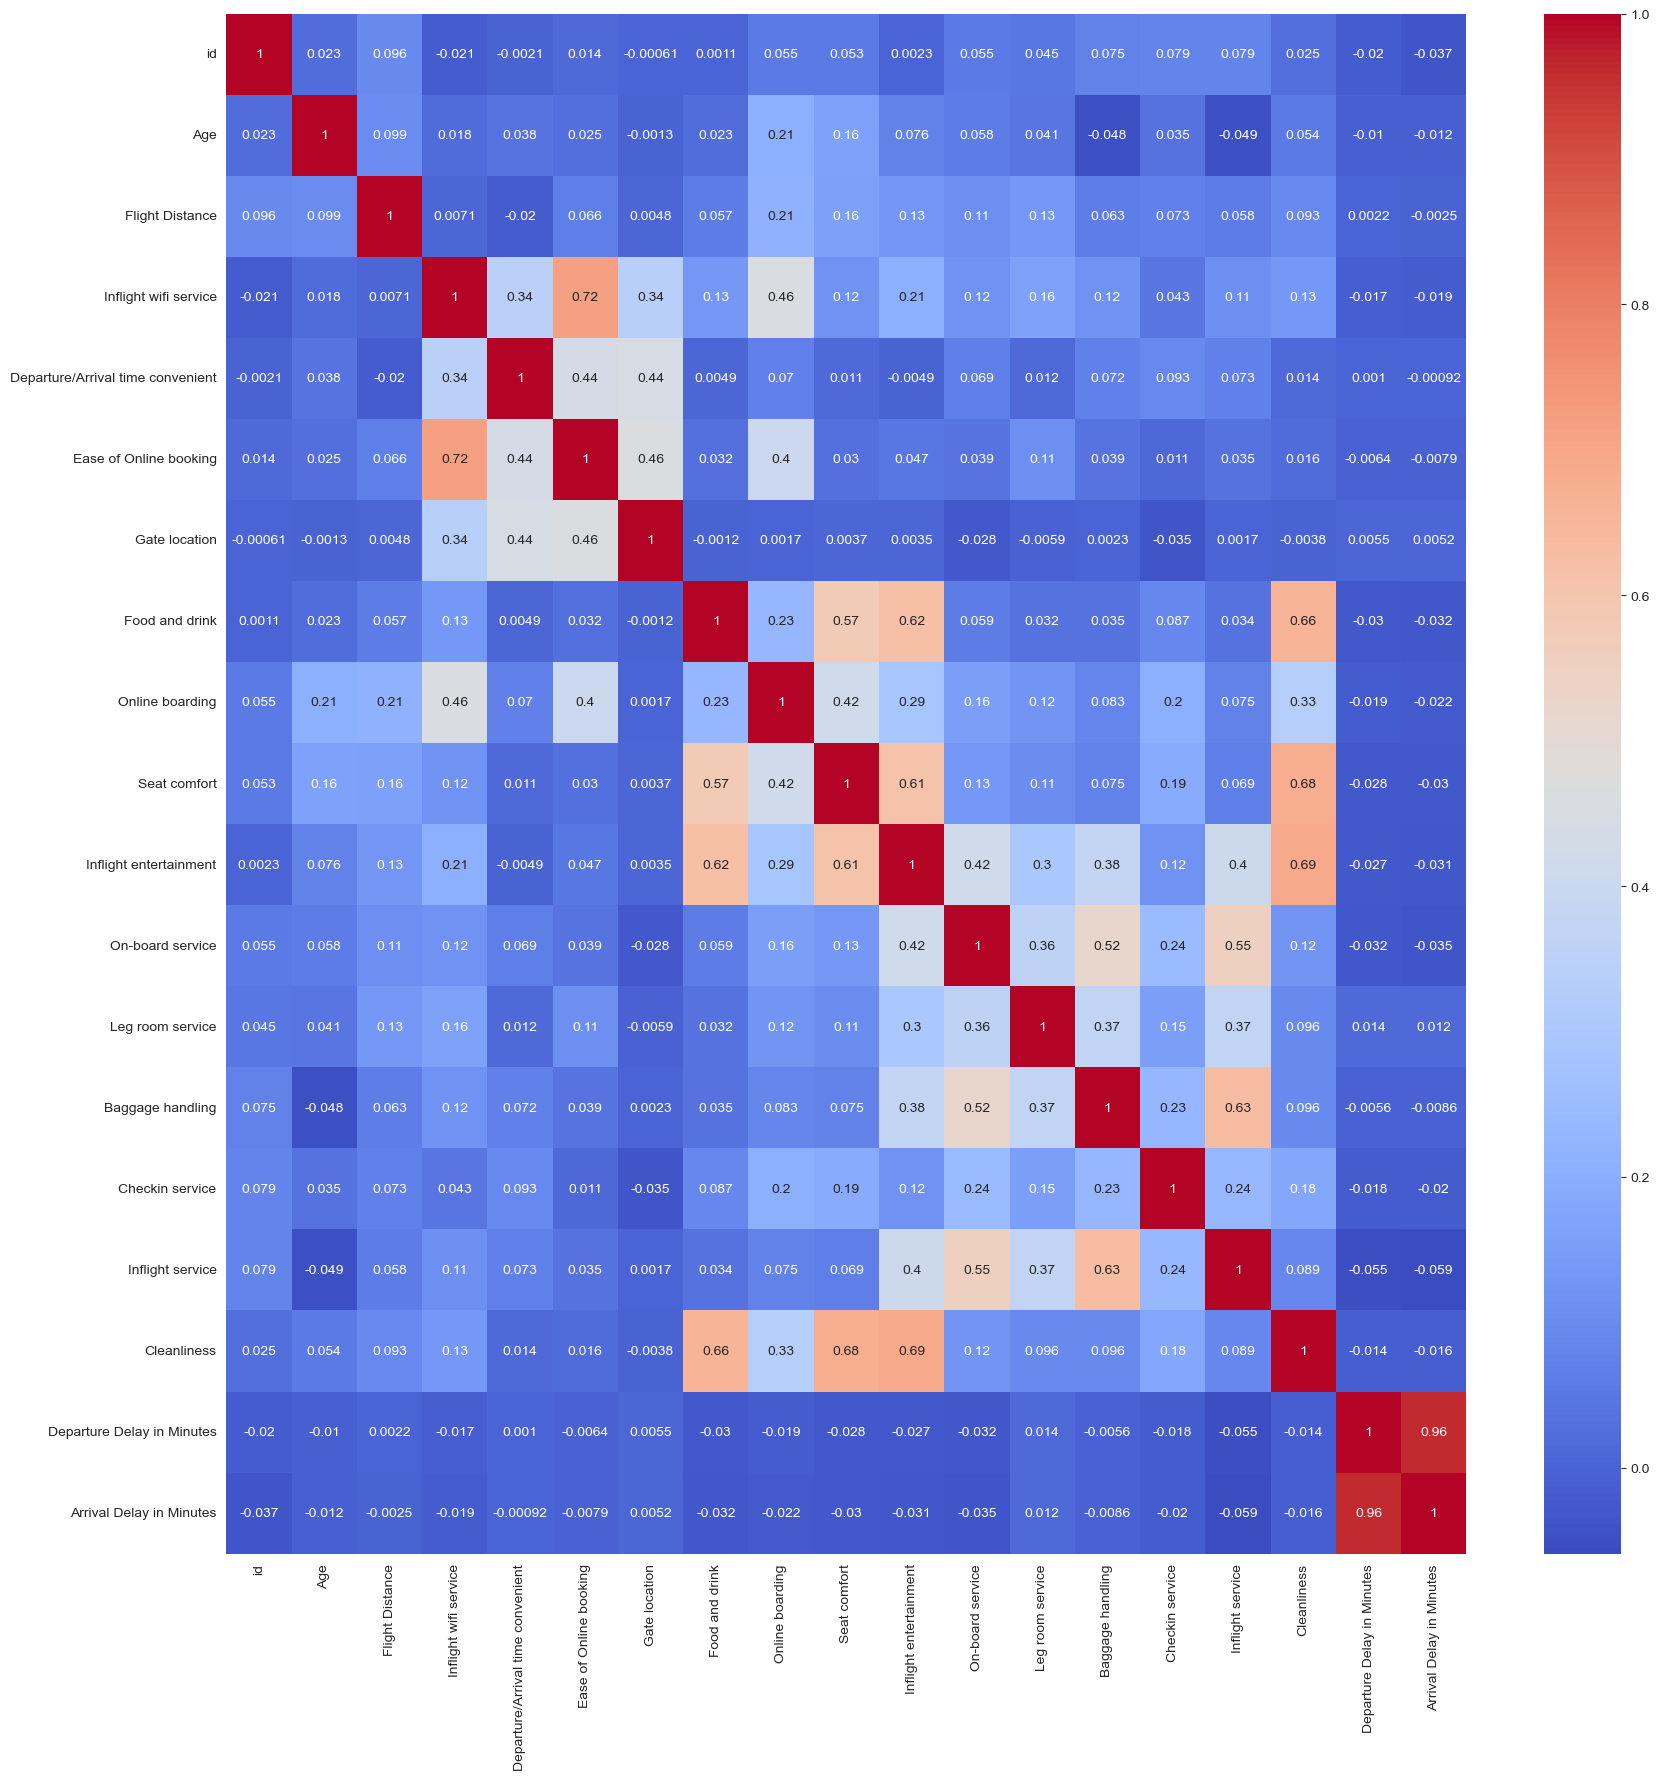

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Interpretation:** 
1. 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are highly correlated : 0.96
2. 'Baggage handling' and 'Inflight Services'  show decent correlation :0.69
3. 'Cleanliness' and 'Seat comfort' : 0.69
4. 'Cleanliness' and 'Inflight entertainment' :0.68

### 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' 

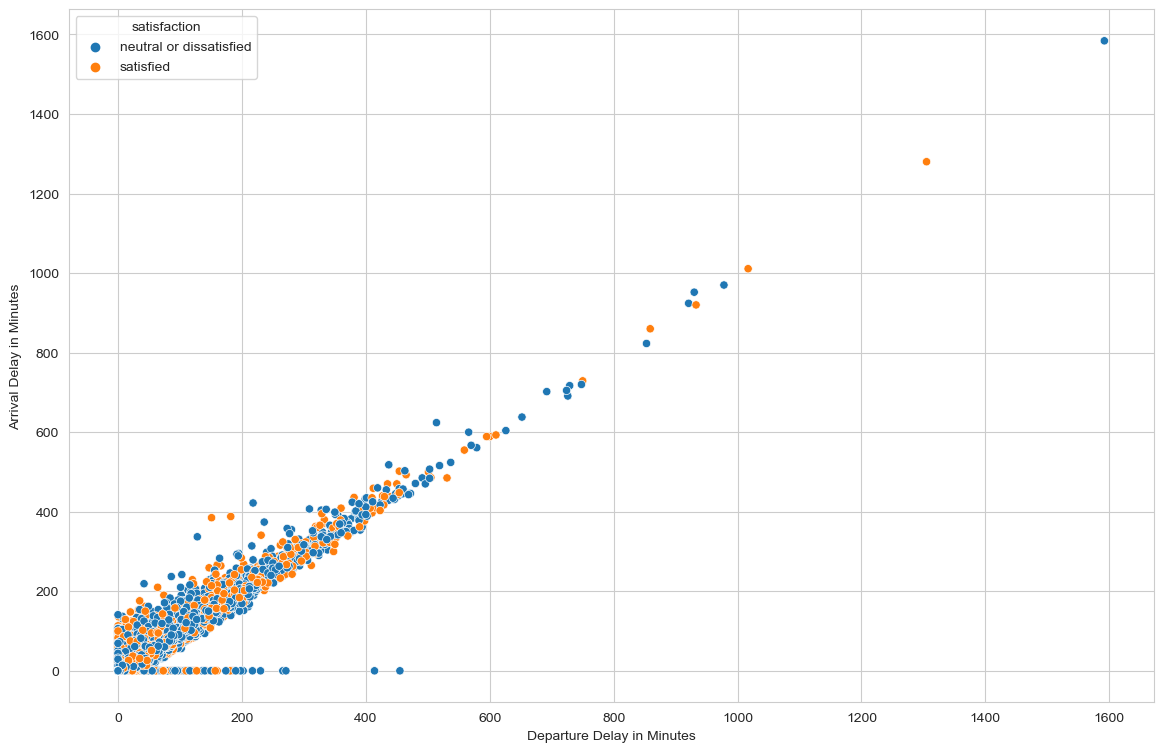

In [103]:
plt.figure(figsize=(14,9))
sns.scatterplot(df['Departure Delay in Minutes'],df['Arrival Delay in Minutes'],hue=df['satisfaction'],palette='tab10')
plt.show()

**Interpretation:** A delay in departure is correlated with a delay in arrival, showing a strong positive relationship between them. However, passenger satisfaction cannot be predicted solely based on these delays as the data is widely dispersed. Other factors likely influence satisfaction.



### Distribution of Categorical Variables

In [104]:
l2=['Gender','Customer Type','Type of Travel','Class']

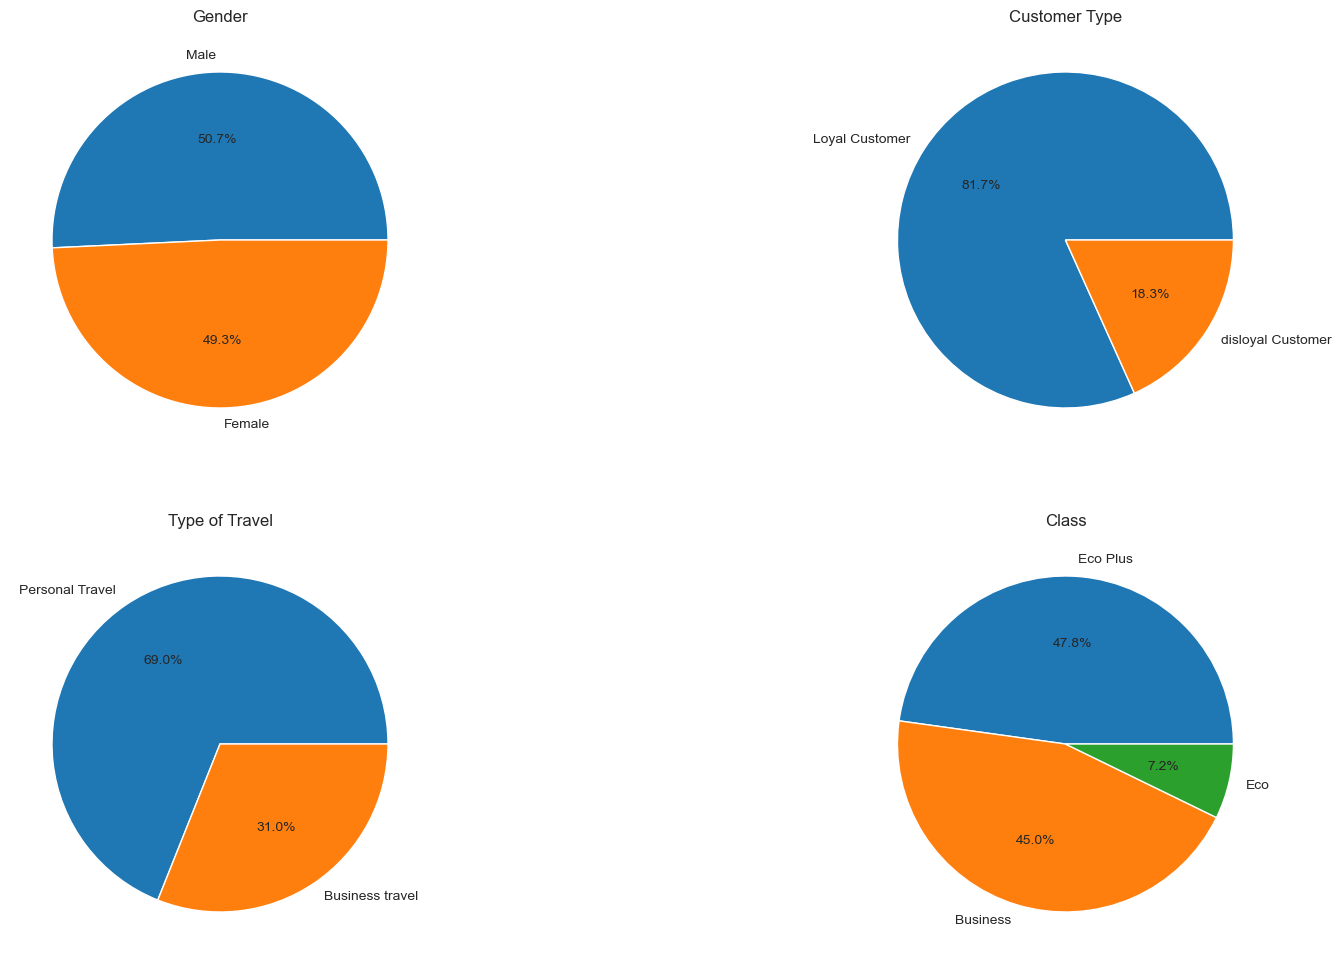

In [105]:
plt.figure(figsize=(20,12))
for i,j in enumerate(l2):
    plt.subplot(2,2,i+1)
    plt.pie(df[j].value_counts(),labels=df[j].unique(),autopct='%1.1f%%')
    plt.title(j)
plt.show()

#### Interpretation:

**Gender:** male: 50.7% and female: 49.3%, Almost equal

**Customer Type:** Loyal Customers: 81.7% (Majority)  and Disloyal Customer: 18.3%

**Type of Travel:** Personal work: 69% and Business work: 31% 

**Class:** Economy Plus class: 47.8% ,Business class: 45% and remaining 7.2% of passengers from Economy class

### Feature Engineering

In [106]:
## we convert these age column into 4 categories - 'kids','youth','adults','elders'
df['Age'] = pd.cut(x = df['Age'], bins=[8,18,30,55,85],labels=['kids','youth','adults','elders'])

In [107]:
## In test dataset also we convert these age column into 4 categories 
df_test['Age'] = pd.cut(x = df_test['Age'], bins=[8,18,30,55,85],labels=['kids','youth','adults','elders'])

In [108]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,kids,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,youth,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,youth,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,youth,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,elders,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### One-Hot Encoding for categorical Variables 


In [109]:
df = pd.get_dummies(df,columns=['Gender','Customer Type','Age','Type of Travel'],drop_first=True)

In [110]:
df_test = pd.get_dummies(df_test,columns=['Gender','Customer Type','Age','Type of Travel'],drop_first=True)

In [111]:
df.head()

,id,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Age_youth,Age_adults,Age_elders,Type of Travel_Personal Travel
0,70172,Eco Plus,460,3,4,3,1,5,3,5,...,5,25,18.0,neutral or dissatisfied,1,0,0,0,0,1
1,5047,Business,235,3,2,3,3,1,3,1,...,1,1,6.0,neutral or dissatisfied,1,1,1,0,0,0
2,110028,Business,1142,2,2,2,2,5,5,5,...,5,0,0.0,satisfied,0,0,1,0,0,0
3,24026,Business,562,2,5,5,5,2,2,2,...,2,11,9.0,neutral or dissatisfied,0,0,1,0,0,0
4,119299,Business,214,3,3,3,3,4,5,5,...,3,0,0.0,satisfied,1,0,0,0,1,0


### Using Map function for Ordinal Categorical column :Class

In [112]:
df['Class']=df['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})
df_test['Class']=df_test['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})

In [113]:
df.head(5)

,id,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Age_youth,Age_adults,Age_elders,Type of Travel_Personal Travel
0,70172,1,460,3,4,3,1,5,3,5,...,5,25,18.0,neutral or dissatisfied,1,0,0,0,0,1
1,5047,2,235,3,2,3,3,1,3,1,...,1,1,6.0,neutral or dissatisfied,1,1,1,0,0,0
2,110028,2,1142,2,2,2,2,5,5,5,...,5,0,0.0,satisfied,0,0,1,0,0,0
3,24026,2,562,2,5,5,5,2,2,2,...,2,11,9.0,neutral or dissatisfied,0,0,1,0,0,0
4,119299,2,214,3,3,3,3,4,5,5,...,3,0,0.0,satisfied,1,0,0,0,1,0


**Interpretation:**'Class' column is treated as ordinal. 'Eco' is 0 (basic), 'Eco Plus' is 1 (slightly premium), 'Business' is 2 (fully premium).

In [114]:
##converting 'satisfaction' column into numerical(0 and 1)
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [115]:
df_test['satisfaction']=df_test['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [116]:
df.head()

,id,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Age_youth,Age_adults,Age_elders,Type of Travel_Personal Travel
0,70172,1,460,3,4,3,1,5,3,5,...,5,25,18.0,0,1,0,0,0,0,1
1,5047,2,235,3,2,3,3,1,3,1,...,1,1,6.0,0,1,1,1,0,0,0
2,110028,2,1142,2,2,2,2,5,5,5,...,5,0,0.0,1,0,0,1,0,0,0
3,24026,2,562,2,5,5,5,2,2,2,...,2,11,9.0,0,0,0,1,0,0,0
4,119299,2,214,3,3,3,3,4,5,5,...,3,0,0.0,1,1,0,0,0,1,0


# Splitting the data

In [147]:
X_train = df.drop(['id','satisfaction'], axis=1)
y_train=df['satisfaction']

In [148]:
X_test = df_test.drop(['id', 'satisfaction'], axis=1)
y_test = df_test['satisfaction']

# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [134]:
print(X_train.shape)

(103904, 24)


In [165]:
lgr = LogisticRegression(max_iter=600, verbose=1)
# fit the model
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

In [166]:
accuracy_logistic=accuracy_score(y_test,y_pred)
accuracy_logistic

0.8630659069910687

In [ ]:
# Checking if the model is overfitting 

In [169]:
train_p = lgr.predict(X_train)
train_accuracy = accuracy_score(y_train, train_p)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8638935940868494


Therefore , the model isn't overfitting as the accuracy achieved from Train set and Test set has no big variation

**Interpretation:** Accuracy is the ratio of correct predictions (i.e. TN+TP) to the total observations.Here, we get our accuracy is 86%

In [167]:
#confusion_matrix()
confusion_matrix_logistic=confusion_matrix(y_test,y_pred)
confusion_matrix_logistic

array([[12899,  1674],
       [ 1883,  9520]], dtype=int64)

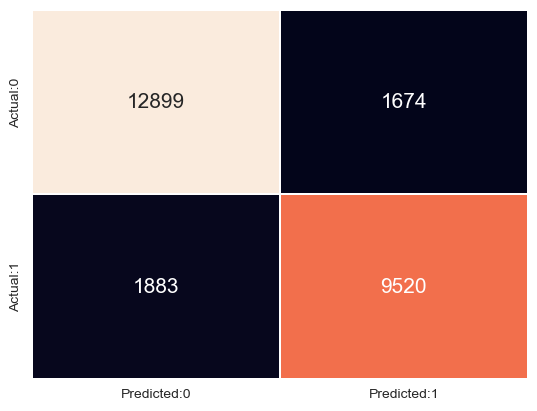

In [168]:

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

**Interpretation:** Confusion matrix gives True positive,True negative,False positive and False negative. 

Here,output of 

TN -12899,

TP-9520,

FP-1674,

FN-1883

In [170]:
# calculate various performance measures
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14573
           1       0.85      0.83      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



In [172]:
print('recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

recall: 0.8348680171884592
f1-score: 0.8425897242996857
precision: 0.8504556012149366


### ROC-AUC score and curve

In [177]:
y_pred_proba =lgr.predict_proba(X_test)

In [179]:
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba[:,1])
roc_auc_logistic

0.9207934754974937

In [180]:
from sklearn.metrics import roc_auc_score,roc_curve

In [182]:
fpr,tpr,threshold = roc_curve(y_test, y_pred_proba[:,1])

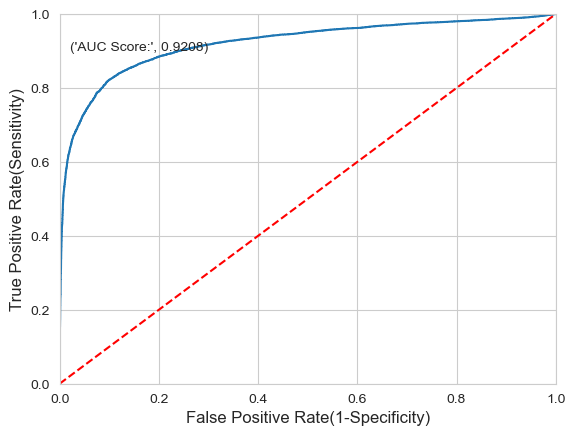

In [184]:
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

# Naive Bayes Model

In [186]:
Naive_bayes=GaussianNB()
Naive_bayes_model =Naive_bayes.fit(X_train,y_train)

In [187]:
y_pred=Naive_bayes_model.predict(X_test)

In [188]:
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.8616415152448413
recall: 0.8212751030430588
f1-score: 0.8390073463537
precision: 0.8575222049262888


**Interpretation:** Accuracy is the ratio of correct predictions (i.e. TN+TP) to the total observations.Here, we get our accuracy is 86%

In [189]:
confusion_matrix_Naive_bayes=confusion_matrix(y_test,y_pred)
confusion_matrix_Naive_bayes

array([[13017,  1556],
       [ 2038,  9365]], dtype=int64)

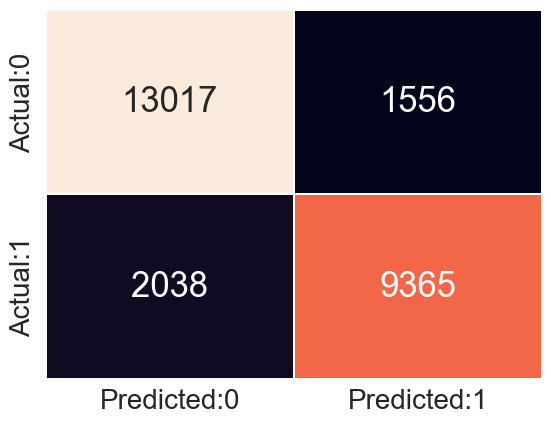

In [190]:

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

**Interpretation:** Confusion matrix gives the output of 
    
TN -13017,

TP-9365,

FP-1556,

FN-2038

### ROC-AUC score and curve

In [191]:
y_pred_proba = Naive_bayes_model.predict_proba(X_test)

In [192]:
roc_auc_naive_bayes = roc_auc_score(y_test, y_pred_proba[:,1])
roc_auc_naive_bayes

0.9194765638696423

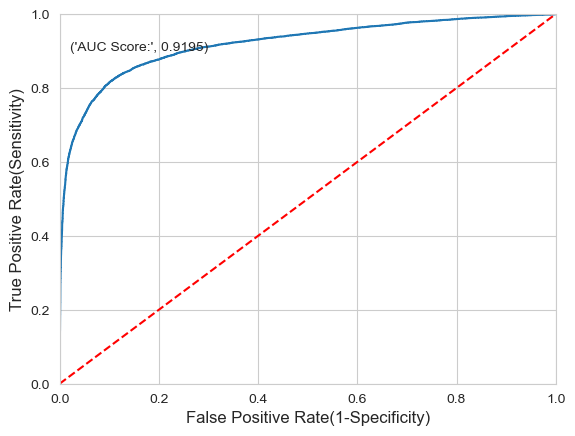

In [193]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

### KNN Model

In [196]:
knn = KNeighborsClassifier()
knn_model =knn.fit(X_train,y_train)


In [201]:
y_pred=knn_model.predict(X_test)

In [202]:
# calculate the accuracy
accuracy_knn=accuracy_score(y_test,y_pred)
accuracy_knn

0.7864952263627965

In [203]:
confusion_matrix_knn=confusion_matrix(y_test,y_pred)
confusion_matrix_knn

array([[12419,  2154],
       [ 3392,  8011]], dtype=int64)

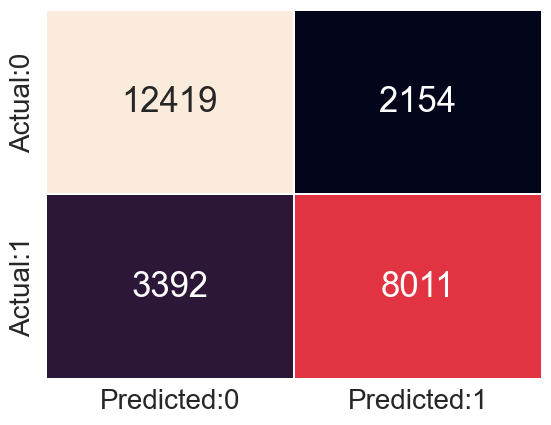

In [204]:

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [205]:
# calculate various performance measures for knn
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     14573
           1       0.79      0.70      0.74     11403

    accuracy                           0.79     25976
   macro avg       0.79      0.78      0.78     25976
weighted avg       0.79      0.79      0.78     25976



### ROC-AUC score and curve

In [85]:
y_pred_proba = Naive_bayes_model.predict_proba(X_test)
roc_auc_naive_bayes = roc_auc_score(y_test, y_pred_proba[:,1])
roc_auc_naive_bayes


0.9185704879417578

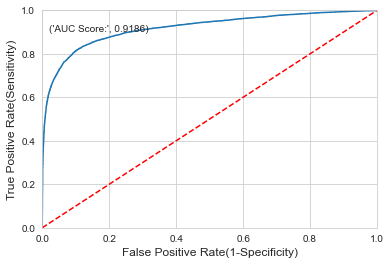

In [86]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

## Decision Tree Classifier

In [212]:
from sklearn.model_selection import GridSearchCV

In [213]:
# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [206]:
dt = DecisionTreeClassifier()

### Perform Grid Search with 5-fold cross-validation

In [214]:

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [215]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)
print("Best model:", best_model)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best model: DecisionTreeClassifier(max_depth=15, min_samples_split=10)


In [216]:
best_dt= DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=10, min_samples_leaf=1)

In [217]:
dt_model = best_dt.fit(X_train,y_train)

In [218]:
# Training Dataset
y_pred_t=dt_model.predict(X_train)

accuracy_dtt=accuracy_score(y_train,y_pred_t)
print(" Training set accuracy :",accuracy_dtt)

 Training set accuracy : 0.9702610101632276


In [219]:
# Test Dataset
y_pred=dt_model.predict(X_test)

In [220]:
accuracy_dt=accuracy_score(y_test,y_pred)
print(" Test dataset accuracy :",accuracy_dt)

 Test dataset accuracy : 0.9548044348629504


In [221]:
confusion_matrix_dt=confusion_matrix(y_test,y_pred)
confusion_matrix_dt

array([[14142,   431],
       [  743, 10660]], dtype=int64)

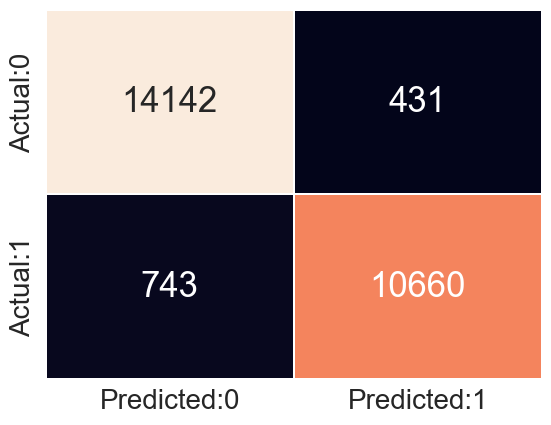

In [222]:

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### ROC-AUC score and curve

In [223]:
y_pred_proba = dt_model.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test, y_pred)
roc_auc_dt


0.9526332332183463

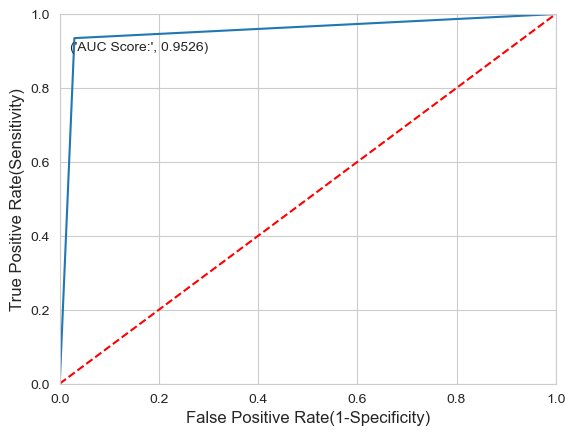

In [224]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

### Random Forest Model

Using RandomizedSearch CV for hyperparameter tuning

In [229]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),  
    'criterion': ['gini', 'entropy'],          
    'max_depth': [None, 5, 10, 15, 20],        
    'min_samples_split': np.arange(2, 11),      
    'min_samples_leaf': np.arange(1, 11),}

In [227]:
rf = RandomForestClassifier()

In [230]:
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])})

In [231]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best hyperparameters:", best_params)
print("Best model:", best_model)

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best model: RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=6, n_estimators=300)


In [232]:
best_model = RandomForestClassifier(**best_params)

In [233]:
best_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=6, n_estimators=300)

In [242]:
y_pred = best_model.predict(X_test)

In [243]:
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9590006159531875


In [322]:
confusion_matrix_rf=confusion_matrix(y_test,y_pred)
confusion_matrix_rf

array([[14249,   324],
       [  667, 10736]], dtype=int64)

In [237]:
#Training Dataset
y_pred=best_model.predict(X_train)

In [240]:
accuracy_rf=accuracy_score(y_train,y_pred)
print("Training dataset accuracy:",accuracy_rf)

Training dataset accuracy: 0.9733888974437943


The model is not overfitting

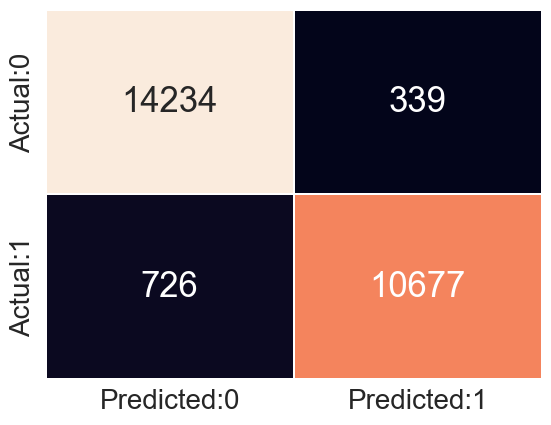

In [244]:

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [246]:
print('recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

recall: 0.9363325440673507
f1-score: 0.9524956510103036
precision: 0.9692265795206971


### ROC-AUC score and curve

In [258]:
y_pred_proba = best_model.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test, y_pred)
roc_auc_dt

0.9276747041790092

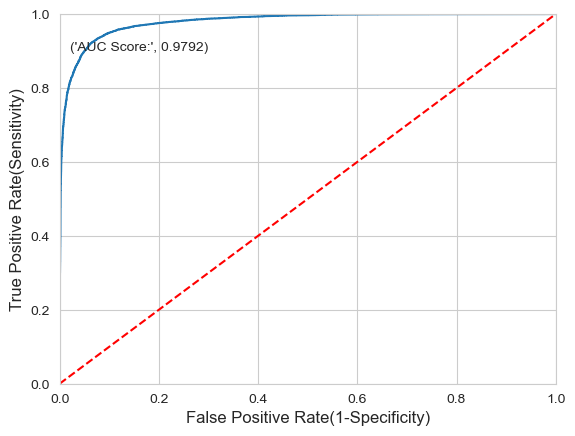

In [259]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4)))
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=12)
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=12)
plt.show()

# AdaBoost Model

#### Using GridSerach CV

In [250]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],       
    'learning_rate': [0.001, 0.01, 0.1, 1.0],  
}


adaboost = AdaBoostClassifier()

grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)
print("Best model:", best_model)

Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best model: AdaBoostClassifier(n_estimators=200)


### Model Building

In [251]:
bestmodel_ada= AdaBoostClassifier(n_estimators=200)

In [252]:
bestmodel_ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [253]:
# Test Dataset
y_pred=bestmodel_ada.predict(X_test)

In [254]:
accuracy_ada=accuracy_score(y_test,y_pred)
print("Test set accuracy:",accuracy_ada)
print('recall:', recall_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

Test set accuracy: 0.929357868801971
recall: 0.9138823116723669
f1-score: 0.9190810071878996
precision: 0.9243391875110875


In [255]:
confusion_matrix_ada=confusion_matrix(y_test,y_pred)
confusion_matrix_ada

array([[13720,   853],
       [  982, 10421]], dtype=int64)

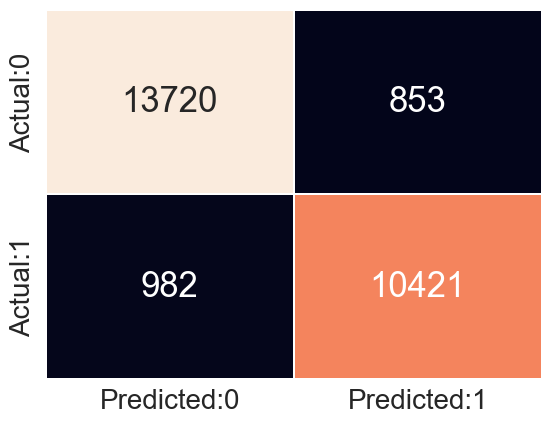

In [256]:

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Comparing the best Models

In [261]:
results = pd.DataFrame()


In [262]:
results['model_name'] = ['logistic regression','Naive-Bayes','KNN','Decision Tree','Random forest','Ada boost']

In [263]:
results['Accuracy'] =[86,86,79,95,96,92]

In [264]:
results

,model_name,Accuracy
0,logistic regression,86
1,Naive-Bayes,86
2,KNN,79
3,Decision Tree,95
4,Random forest,96
5,Ada boost,92


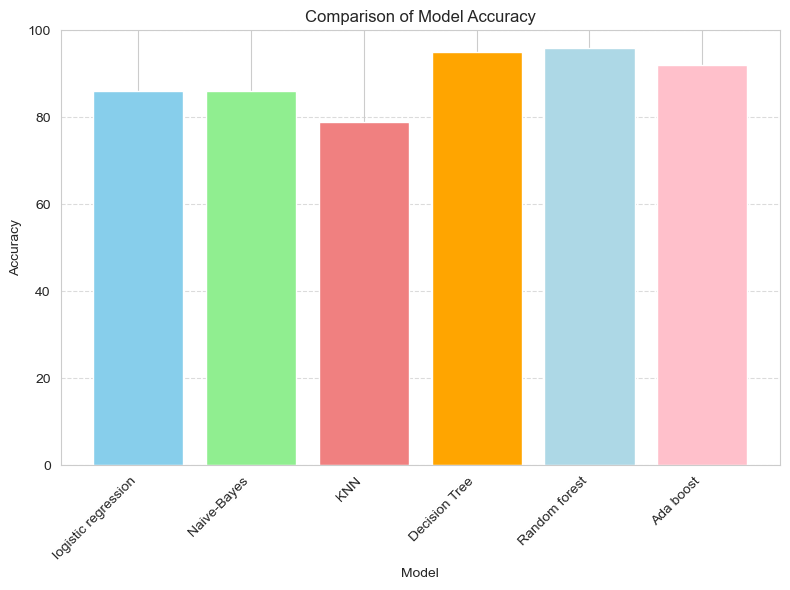

In [271]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue', 'pink']


plt.figure(figsize=(8, 6))
plt.bar(results['model_name'], results['Accuracy'], color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





**Random Forest Classifier is the best performing model for the given dataset with 96% accuracy and 95% F1 score**

## Recommendations to Improve Airline Passenger Satisfaction::
Based on EDA observations the following suggestions have been made:
- Seat comfort, inflight experience and ease online level significantly affect the customer experience along with the several other variables considered.
- Airlines should highly focus on inflight Wi-Fi experience.
- Ease of online booking is important for business customers.
- Maintain Class-Based Balance: Ensure a balanced approach to services across different travel classes, avoiding over-bias towards any specific section of passengers and striving for overall passenger satisfaction.
- The airline service companies must ensure the high quality of service in these parameters to ensure a high level of customer satisfaction.